In [58]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.factorplots import interaction_plot
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
import scipy.stats as stats

In [2]:
le = pd.read_csv('Life Expectancy Data.csv', delimiter=',')
le.dataframeName = 'Life Expectancy Data.csv'
le.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
le1=le.drop(['Country','Adult Mortality','infant deaths','Alcohol','percentage expenditure','Hepatitis B','under-five deaths ','Polio','Measles ',' HIV/AIDS','Diphtheria ','GDP','Population','Schooling'," thinness  1-19 years"," thinness 5-9 years","Income composition of resources"],axis=1)

In [4]:
le1=le1.dropna()
le1.shape

(2684, 5)

In [16]:
le1.head()

,Year,Status,Life expectancy,BMI,Total expenditure
0,2011-2015,Developing,65.0,normal,high
1,2011-2015,Developing,59.9,normal,high
2,2011-2015,Developing,59.9,underweight,high
3,2011-2015,Developing,59.5,underweight,high
4,2011-2015,Developing,59.2,underweight,high


In [6]:
def number_to_flag(number):
    if number <= 2005 :
        return '2000-2005'
    elif 2005 < number <= 2010:
        return '2006-2010'
    else:
        return '2011-2015'
le1['Year'] = le1['Year'].map(number_to_flag)

def number_to_flag1(number):
    if number <= 18.5 :
        return 'underweight'
    elif 18.5 < number <= 30:
        return 'normal'
    else:
        return 'obese'
le1[' BMI '] = le1[' BMI '].map(number_to_flag1)

def number_to_flag2(number):
    if number <= 5.76 :
        return 'low'
    else:
        return 'high'
le1['Total expenditure'] = le1['Total expenditure'].map(number_to_flag2)

le1.head()

,Year,Status,Life expectancy,BMI,Total expenditure
0,2011-2015,Developing,65.0,normal,high
1,2011-2015,Developing,59.9,normal,high
2,2011-2015,Developing,59.9,underweight,high
3,2011-2015,Developing,59.5,underweight,high
4,2011-2015,Developing,59.2,underweight,high


Text(0.5, 1, 'Boxplot, Life expectancy for Year')

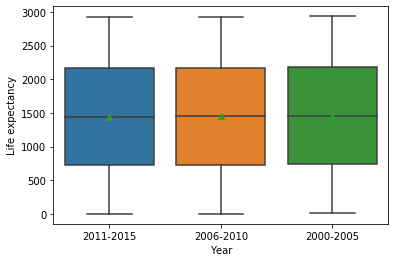

In [97]:
le1['Life expectancy'] = le1.index
sns.boxplot(
    data=le1, showmeans=True,
    y='Life expectancy',
    x='Year'
)
ax.set_title('Boxplot, Life expectancy for Year')

Text(0.5, 1, 'Boxplot, Life expectancy for Status')

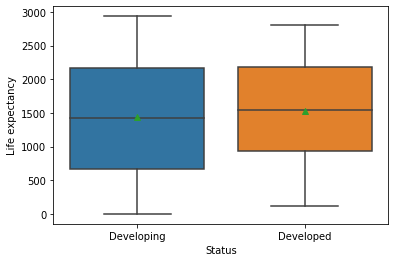

In [41]:
sns.boxplot(
    data=le1, showmeans=True,
    y='Life expectancy',
    x='Status'
)
ax.set_title('Boxplot, Life expectancy for Status')

Text(0.5, 1, 'Boxplot, Life expectancy for BMI')

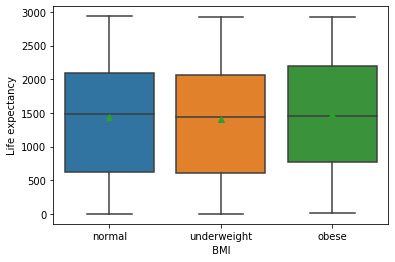

In [42]:
sns.boxplot(
    data=le1, showmeans=True,
    y='Life expectancy',
    x=' BMI '
)
ax.set_title('Boxplot, Life expectancy for BMI')

Text(0.5, 1, 'Boxplot, Life expectancy for Total expenditure')

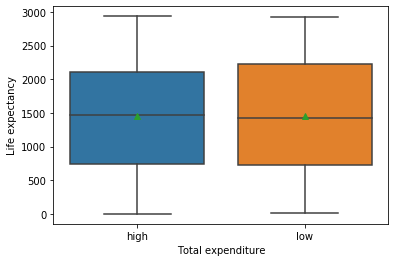

In [43]:
sns.boxplot(
    data=le1, showmeans=True,
    y='Life expectancy',
    x='Total expenditure'
)
ax.set_title('Boxplot, Life expectancy for Total expenditure')

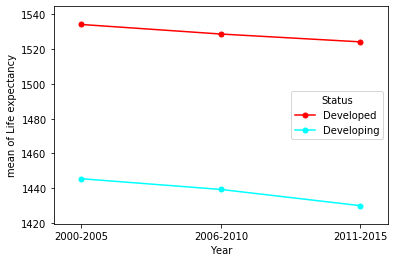

In [68]:
fig = interaction_plot(le1['Year'], le1['Status'],
                       le1['Life expectancy'],
                       ms=10, ax = plt.gca())

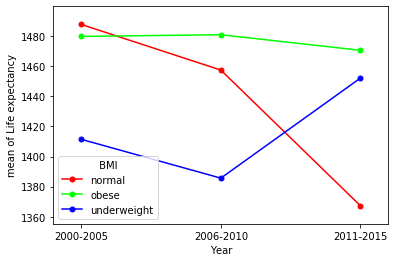

In [67]:
fig = interaction_plot(le1['Year'], le1[' BMI '],
                       le1['Life expectancy'],
                        ms=10, ax = plt.gca())

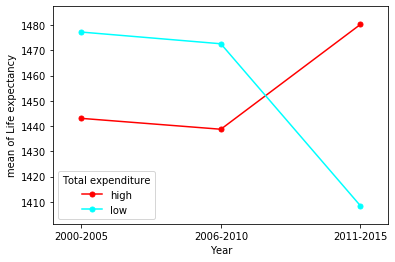

In [69]:
fig = interaction_plot(le1['Year'], le1['Total expenditure'],
                       le1['Life expectancy'],
                       ms=10, ax = plt.gca())

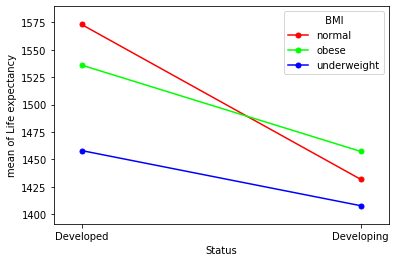

In [70]:
fig = interaction_plot(le1['Status'], le1[' BMI '],
                       le1['Life expectancy'],
                       ms=10, ax = plt.gca())

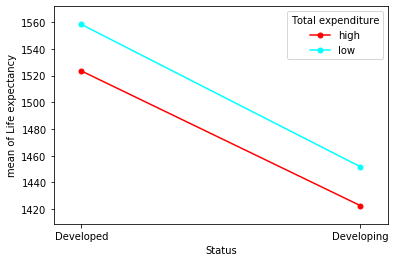

In [71]:
fig = interaction_plot(le1['Status'], le1['Total expenditure'],
                       le1['Life expectancy'],
                       ms=10, ax = plt.gca())

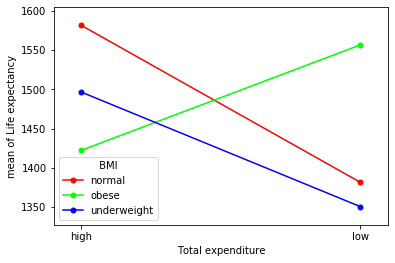

In [73]:
fig = interaction_plot(le1['Total expenditure'], le1[' BMI '],
                       le1['Life expectancy'],
                       ms=10, ax = plt.gca())

In [ ]:
le1.rename(columns={"Life expectancy ":"Life_expectancy"," BMI ":"BMI","Total expenditure":"Total_expenditure"},inplace=True)
le1.head()

In [31]:
model = ols('Life_expectancy ~ Year+Status+BMI+Total_expenditure+Year:Status+Year:BMI+Year:Total_expenditure+Status:BMI+Status:Total_expenditure+BMI:Total_expenditure+Year:Status:BMI+Year:Status:Total_expenditure+Year:BMI:Total_expenditure+Status:BMI:Total_expenditure', data=le1).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                      sum_sq      df           F  \
Year                             5266.367715     2.0   61.197440   
Status                          26170.580683     1.0  608.226632   
BMI                             50801.352504     2.0  590.333396   
Total_expenditure                   0.109904     1.0    0.002554   
Year:Status                         5.643171     2.0    0.065576   
Year:BMI                         2898.503272     4.0   16.840922   
Year:Total_expenditure            413.290867     2.0    4.802616   
Status:BMI                       7008.662760     2.0   81.443652   
Status:Total_expenditure           85.539404     1.0    1.988009   
BMI:Total_expenditure            2052.807569     2.0   23.854500   
Year:Status:BMI                   715.969523     4.0    4.159936   
Year:Status:Total_expenditure      12.834305     2.0    0.149140   
Year:BMI:Total_expenditure       1883.537750     4.0   10.943756   
Status:BMI:Total_expenditure      629.815051    

In [44]:
import collections

a = collections.Counter(le1['Year'])
b = collections.Counter(le1['Status'])
c = collections.Counter(le1['BMI'])
d = collections.Counter(le1['Total_expenditure'])
print(a)
print(b)
print(c)
print(d)

Counter({'2000-2005': 1071, '2006-2010': 895, '2011-2015': 718})
Counter({'Developing': 2204, 'Developed': 480})
Counter({'obese': 1602, 'underweight': 639, 'normal': 443})
Counter({'low': 1346, 'high': 1338})


In [72]:
MultiComp = MultiComparison(le1['Life_expectancy'],le1['Year'])
print(MultiComp.tukeyhsd().summary())

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj  lower  upper  reject
--------------------------------------------------------
2000-2005 2006-2010   2.0492  0.001  1.049 3.0493   True
2000-2005 2011-2015   3.7048  0.001 2.6396   4.77   True
2006-2010 2011-2015   1.6556 0.0013 0.5492  2.762   True
--------------------------------------------------------


In [68]:
MultiComp1 = MultiComparison(le1['Life_expectancy'],le1['BMI'])
print(MultiComp1.tukeyhsd().summary())

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1    group2   meandiff p-adj   lower    upper  reject
----------------------------------------------------------
normal       obese  11.9163  0.001  10.9321 12.9005   True
normal underweight    1.396 0.0109   0.2624  2.5296   True
 obese underweight -10.5203  0.001 -11.3782 -9.6624   True
----------------------------------------------------------
